<a href="https://colab.research.google.com/github/NoeZGravity/IS403.N21.HTTT-Nhom9/blob/20521688-DinhThiAnhNguyet/ASUS_Seq2seq_721.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1. Import thư viện
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#2. # 2. Đọc file csv và gắn index với giá Close
data=pd.read_csv("/content/drive/MyDrive/DataFiles/DataFinal/2357.TW.csv")
data1=data.reset_index()['Close']

In [ ]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
data1=scaler.fit_transform(np.array(data1).reshape(-1,1))

In [ ]:
# 4. Chia train test
train_size = int(0.7 * len(data1))
test_size = int(0.2 * len(data1))
val_size = len(data1) - train_size - test_size

train_data = data1[:train_size]
test_data = data1[train_size:train_size+test_size]
val_data = data1[train_size+test_size:]


In [ ]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100

train_X, train_Y = create_dataset(train_data, time_step)
test_X, test_Y = create_dataset(test_data, time_step)
valid_X, valid_Y = create_dataset(val_data, time_step)

In [ ]:
# 7. Reshape input to be [samples, time steps, features] which is required for seq2seq
train_X =train_X.reshape(train_X.shape[0],train_X.shape[1] , 1)
test_X = test_X.reshape(test_X.shape[0],test_X.shape[1] , 1)
valid_X = valid_X.reshape(valid_X.shape[0],valid_X.shape[1] , 1)

In [ ]:
#8. Xây dựng mô hình Seq2Seq
model = Sequential()
model.add(LSTM(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')


In [ ]:
#9. Huấn luyện mô hình
model.fit(train_X, train_Y,validation_data=(test_X,test_Y), epochs=50, batch_size=32)

Epoch 1/50
27/27 [==============================] - 7s 136ms/step - loss: 0.0236 - val_loss: 0.0055
Epoch 2/50
27/27 [==============================] - 2s 64ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 3/50
27/27 [==============================] - 2s 60ms/step - loss: 0.0015 - val_loss: 0.0024
Epoch 4/50
27/27 [==============================] - 2s 58ms/step - loss: 0.0013 - val_loss: 0.0022
Epoch 5/50
27/27 [==============================] - 1s 55ms/step - loss: 0.0013 - val_loss: 0.0020
Epoch 6/50
27/27 [==============================] - 1s 55ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 7/50
27/27 [==============================] - 1s 54ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 8/50
27/27 [==============================] - 2s 59ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 9/50
27/27 [==============================] - 3s 98ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 10/50
27/27 [==============================] - 2s 84ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 11

In [ ]:
# 10. Dự báo dữ liệu train, test, val
train_predict=model.predict(train_X)
y_pred=model.predict(test_X)
y_pred_val=model.predict(valid_X)

2/2 [==============================] - 0s 13ms/step


In [ ]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [ ]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE, MAE, MAPE
valid_rmse = np.sqrt(np.mean((y_pred_val - valid_Y)**2))
test_rmse = np.sqrt(np.mean((y_pred - test_Y)**2))
valid_mae = np.mean(np.abs((y_pred_val - valid_Y)))
test_mae = np.mean(np.abs((y_pred - test_Y)))
valid_mape = np.mean(np.abs((y_pred_val - valid_Y)/valid_Y))
test_mape = np.mean(np.abs((y_pred - test_Y)/test_Y))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 299.5509780448473
Testing RMSE: 305.9891353733879
Validation MAE: 299.28868550688594
Testing MAE: 301.99523325568316
Validation MAPE: 557.9557877126506
Testing MAPE: 664.2632151973789


In [ ]:
# 13. Dự báo 30 ngày tiếp theo
x_input=val_data[-time_step:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
while(i<30):

    if(len(temp_input)>time_step):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.6371452]
101
1 day input [0.42259414 0.43723849 0.41422594 0.41213389 0.39539749 0.40794979
 0.41213389 0.40794979 0.458159   0.42468619 0.43723849 0.45188285
 0.44979079 0.44142259 0.44979079 0.44769874 0.44142259 0.41631799
 0.43514644 0.44351464 0.44142259 0.44979079 0.45606695 0.44979079
 0.45606695 0.45606695 0.46025105 0.44979079 0.44142259 0.4623431
 0.4748954  0.48535565 0.49790795 0.48953975 0.48117155 0.5125523
 0.39958159 0.37866109 0.38075314 0.38702929 0.42050209 0.39958159
 0.41004184 0.41213389 0.41422594 0.41631799 0.41422594 0.41004184
 0.42259414 0.42677824 0.42677824 0.41841004 0.41631799 0.42050209
 0.43096234 0.45188285 0.43933054 0.44769874 0.4623431  0.45188285
 0.45188285 0.44351464 0.44142259 0.45188285 0.44979079 0.43933054
 0.458159   0.46861925 0.4832636  0.48953975 0.5083682  0.4958159
 0.49372385 0.5083682  0.50627615 0.48535565 0.46443515 0.55648536
 0.55648536 0.55648536 0.57531381 0.57531381 0.56903766 0.57112971
 0.57531381 0.56066946 0.57740586 0.5

Validation RMSE: 299.5509780448473
Testing RMSE: 305.9891353733879
Validation MAE: 299.28868550688594
Testing MAE: 301.99523325568316
Validation MAPE: 557.9557877126506
Testing MAPE: 664.2632151973789


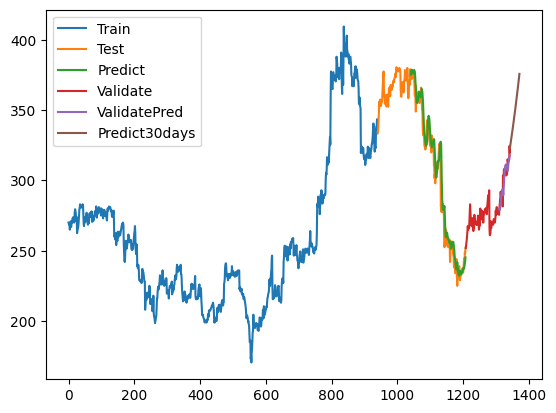

In [ ]:
# 14.Vẽ hình
import matplotlib.pyplot as plt
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+time_step+1, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+time_step+1, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(data1)-1, stop=len(data1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()